<h1 style="font-size:2em">Projet 4 - Anticipez les besoins en consommation de bâtiments (Regressions)</h1>

# Objectifs

~~DummyRegressor~~, ~~Ridge~~, ~~Lasso~~ -> a utiliser  
GridSearshCV (R2, RMSE, MAE) / Nb k-folds   
0.1 1 10 100 -> log(N) -> Marche mieux    
Algo linéaire, non linéaire, ~~GradiantBoost (X)GBoost, Arbre de décision~~   
Conclusion powerpoint: Pistes d'amélioration du projet

- **Objectif:** Ville de Seattle neutre en émissions de carbone en 2050
- Analyse sur la consommation et aux émissions des bâtiments **non destinés à l’habitation.**  
- Comparer une estimation avec des features classiques et avec la feature **ENERGYSTARScore**  
- Targets : **émissions de CO2** + **consommation totale d’énergie**

## Variables

- **OSEBuildingID** : L'ID du batiment	
- **DataYear** : Année de consommation
- **BuildingType** : Type de Building (Résidence ou pas)
- **PrimaryPropertyType** : Type de propriété (Hotel, Ecole...)
- **PropertyName** : Nom du bâtiment
- **Address** : L'adresse du bâtiment
- **City** : La ville ou est situé le bâtiment
- **State** : L'état ou est situé le bâtiment
- **ZipCode** : Code postal (peut etre différent même dans un même état)
- **TaxParcelIdentificationNumber** : Numero identification (fiscale)
- **CouncilDistrictCode** : code du district du conseil de la ville de Seattle  
- **Neighborhood** : Quartier
- **Latitude** : La latitude
- **Longitude** : La longitude
- **YearBuilt** : Date de création ou de rénovation  
- **NumberofBuildings** : Nombre de buildings dans la propriété
- **NumberofFloors** : Nombre d'étages
- **PropertyGFATotal** : Surface brute de plancher totale du bâtiment et du parking 
- **PropertyGFAParking** : Espace brute de tous les types de stationnement  
- **PropertyGFABuilding(s)** : Surface brute du bâtiment  
- **ListOfAllPropertyUseTypes** : Types d'utilisation de la propriété  
- **LargestPropertyUseType** : Type d'utilisation principale de la propriété 
- **LargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation principale)
- **SecondLargestPropertyUseType** : Type d'utilisation secondaire de la propriété 
- **SecondLargestPropertyUseTypeGFA**: Surface brute de plancher (Utilisation secondaire) 
- **ThirdLargestPropertyUseType** : Type d'utilisation tertiaire de la propriété 
- **ThirdLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation tertiaire) 
- **YearsENERGYSTARCertified** : Année auquel la propriété a recu la certification ENERGYSTAR
- **ENERGYSTARScore** : Score (de 1 a 100) qui calcule la performance énergétique d'un bien immobilier
- **SiteEUI(kBtu/sf)** : Energie annuelle consommée d'un bien immobilier / Surface brute de plancher
- **SiteEUIWN(kBtu/sf)** : SiteEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
- **SourceEUI(kBtu/sf)** : Energie annuelle consommée d'un bien immobilier (y compris les pertes) / Surface brute de plancher
- **SourceEUIWN(kBtu/sf)** : SourceEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
- **SiteEnergyUse(kBtu)** : Quantité annuelle d'énergie consommée, toutes sources d'énergie confondues
- **SiteEnergyUseWN(kBtu)** : SiteEnergyUse(kBtu) normalisée en fonctions des conditions météologiques
- **SteamUse(kBtu)** : Quantité annuelle de vapeur urbaine consommée
- **Electricity(kWh)** : Quantité annuelle d'électricité consommée
- **Electricity(kBtu)** : Electricity mais en British thermal units (kBtu)
- **NaturalGas(therms)** : Quantité annuelle de gaz naturel consommée (therms)
- **NaturalGas(kBtu)** : NaturalGas mais en British thermal units (kBtu).
- **DefaultData** : A t'on utilisé des valeurs par défault (fausses valeurs) sur certaines features?
- **Comments** : Commentaires du propriétaire ajoutant du contexte sur les valeurs des features
- **ComplianceStatus** : Satisfait t'il aux exigences de l'analyse de la consommation d'énergie?
- **Outlier** : Ce bâtiment est il dans la moyenne ou exceptionnel?
- **TotalGHGEmissions** : Quantité totale d'émissions de (dioxyde de carbone + le méthane + l'oxyde nitreux)
- **GHGEmissionsIntensity** : TotalGHGEmissions / Surface brute de plancher de la propriété

# Imports et configs

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd 
df = pd.read_csv('DataCleaned.csv', sep = ",")

In [3]:
df.head()

Age  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0   89  47.61220 -122.33799                1.0              12   
1   20  47.61317 -122.33393                1.0              11   
2   90  47.61412 -122.33664                1.0              10   
3   90  47.61390 -122.33283                1.0              11   
4  112  47.60294 -122.33263                1.0              15   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    88434.0                              0.0   
1                    83880.0                          15064.0   
2                    61320.0                              0.0   
3                    81352.0                              0.0   
4                   163984.0                              0.0   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  TotalGHGEmissions  \
0                             0.0             60.0             249.98   
1                          4622.0             61.0             295.86   
2                             0.0             56.0             286.43   
3                             0.0             27.0             176.14   
4                             0.0             43.0             392.16   

   SiteEnergyUseWN(kBtu)  BuildingType_Campus  BuildingType_NonResidential  \
0              7456910.0                    0                            1   
1              8664479.0                    0                            1   
2              6946800.5                    0                            1   
3              6062767.5                    0                            1   
4             14194054.0                    0                            1   

   BuildingType_Nonresidential COS  BuildingType_SPS-District K-12  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   LargestPropertyUseType_Bank Branch  LargestPropertyUseType_Courthouse  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   LargestPropertyUseType_Data Center  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   LargestPropertyUseType_Distribution Center  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   LargestPropertyUseType_Financial Office  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   LargestPropertyUseType_Hospital (General Medical & Surgical)  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   LargestPropertyUseType_Hotel  LargestPropertyUseType_K-12 School  \
0                             1                                   0   
1                             1                                  

On a 2 targets: 
- TotalGHGEmissions
- SiteEnergyUseWN(kBtu)

On a aussi 2 facons de faire nos features:
- Tout prendre **SANS** ENERGYSTARScore
- Tout prendre **AVEC** ENERGYSTARScore

# Fonctions (pour ne pas alourdir le fichier)

## Création (X,Y) - (Train,Test)

In [4]:
def prepare_data(df, target_col, cols_to_drop, test_size=0.3, random_state=42):
    from sklearn.model_selection import train_test_split
    X = df.drop(cols_to_drop, axis=1)
    Y = df[target_col]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test

## Regression

### Naive (DummyRegressor)

Modèle simple utilisé pour créer une référence de base.   
Plutôt que d'apprendre à partir des données, ce modèle utilise des stratégies simples pour prédire les valeurs cibles.  
Dans ce code, les stratégies utilisés sont les suivantes:

    strategies = {
        'mean': {},
        'quantile': {'quantile': [0, 0.25, 0.5, 0.75, 1]},
    }

In [5]:
from sklearn.model_selection import ParameterGrid, cross_validate, KFold
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def evaluate_dummy_regressor(X_train, X_test, Y_train, Y_test):
    # On définit les métriques
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}

    strategies = {
        'mean': {},
        'quantile': {'quantile': [0, 0.25, 0.5, 0.75, 1]},
    }

    # Liste pour stocker les résultats
    results = []

    # Boucle sur les nombres de splits
    for n_splits in [5, 10]:
        # On définit les KFold pour la validation croisée
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Pour chaque stratégie
        for strategy, params in strategies.items():

            # Générer toutes les combinaisons de paramètres
            param_grid = ParameterGrid(params)

            for param_combination in param_grid:

                # Créer et adapter le modèle pour chaque combinaison de paramètres
                dummy = DummyRegressor(strategy=strategy, **param_combination)
                scores = cross_validate(dummy, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)

                # Enregistrer les scores et les paramètres pour chaque nombre de folds
                for fold in range(kf.get_n_splits()):
                    results.append({
                        'Folds': str(n_splits),
                        'strategy': strategy,
                        'params': param_combination,
                        'R2': scores['test_R2'][fold],
                        'RMSE': scores['test_RMSE'][fold],
                        'MAE': scores['test_MAE'][fold]
                    })

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)

    # Extraire les valeurs des paramètres
    results_df['param_value'] = results_df['params'].apply(lambda x: list(x.values())[0] if x else 'None')

    # Calculer la moyenne des scores pour chaque combinaison de paramètres
    mean_scores = results_df.groupby(['Folds', 'strategy', 'param_value']).mean(numeric_only=True).reset_index()

    # Ajouter un classement en fonction de R2, RMSE et MAE
    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)

    # Réorganiser les lignes en fonction de R2
    mean_scores = mean_scores.sort_values(by='R2_rank')

    # Réinitialiser l'index du DataFrame
    mean_scores = mean_scores.reset_index(drop=True)

    # Calculer la mesure agrégée des classements
    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank')
    mean_scores = mean_scores.reset_index(drop=True)
    
    # Calculer le classement final
    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min', ascending=True).astype(int)
    display(mean_scores)
    
    best_row = mean_scores.loc[mean_scores['Rank_final'] == 1]
    best_strategy = best_row['strategy'].values[0]
    best_param_value = best_row['param_value'].values[0]
    best_params = {best_strategy: best_param_value} if best_param_value != 'None' else {}

    best_model = DummyRegressor(strategy=best_strategy, **best_params)
    best_model.fit(X_train, Y_train)

    y_pred = best_model.predict(X_test)

    scores = pd.DataFrame({
        'Strategy': [best_strategy],
        'Parameter Value': [best_param_value],
        'R2_Test': [r2_score(Y_test, y_pred)],
        'RMSE_Test': [np.sqrt(mean_squared_error(Y_test, y_pred))],
        'MAE_Test': [mean_absolute_error(Y_test, y_pred)]
    })

    scores.index = ['Régréssion Dummy']
    return scores

### Linéaire

#### Regressions ridge/lasso/elasticnet

Régression linéaire régularisée.  

- **ridge** : pénalité L2 (alpha α)  
- **lasso** : pénalité L1 (alpha α)  
- **elasticnet** : pénalité L2 (alpha α) et l1_ratio (compris entre 0 et 1)

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np

def evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='ridge'):
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}
    kfolds = [KFold(n_splits=n_splits, shuffle=True, random_state=42) for n_splits in [5, 10]]
    alphas = np.logspace(-4, 4, 10)  
    l1_ratios = np.geomspace(start=1e-10, stop=1, num=10)  
    results = []

    param_grid = {'alpha': alphas}
    model_class = {'ridge': Ridge, 'lasso': Lasso}.get(regressor, None)

    if regressor == 'elasticnet':
        model_class = ElasticNet
        param_grid['l1_ratio'] = l1_ratios

    if model_class is None:
        raise ValueError(f"Invalid regressor: {regressor}. Must be 'ridge', 'lasso', or 'elasticnet'.")

    for params in ParameterGrid(param_grid):
        model = model_class(**params, max_iter=1000000)
        pipeline = make_pipeline(StandardScaler(), model)
        for kf in kfolds:
            scores = cross_validate(pipeline, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)
            for fold in range(kf.get_n_splits()):
                result = {
                    'Folds': kf.get_n_splits(),
                    'R2': scores['test_R2'][fold],
                    'RMSE': scores['test_RMSE'][fold],
                    'MAE': scores['test_MAE'][fold]
                }
                result.update(params)
                results.append(result)

    results_df = pd.DataFrame(results)
    group_cols = ['Folds'] + list(param_grid.keys())
    mean_scores = results_df.groupby(group_cols).mean(numeric_only=True).reset_index()
    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)
    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank').reset_index(drop=True)
    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min', ascending=True).astype(int)
    display(mean_scores.head(10))

    best_params = mean_scores.loc[mean_scores['Rank_final'] == 1, list(param_grid.keys())].to_dict('records')[0]
    best_model = make_pipeline(StandardScaler(), model_class(**best_params, max_iter=100000))
    best_model.fit(X_train, Y_train)
    
    # Display feature importance
    importance = best_model.named_steps[model_class.__name__.lower()].coef_
    # Obtenir les noms des fonctionnalités à partir des colonnes de X_train
    feature_names = X_train.columns

    # Normalisation des valeurs d'importance
    importance_normalized = np.abs(importance) / np.sum(np.abs(importance))

    # Création d'un DataFrame pour les noms de fonctionnalités et leur importance
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_normalized})

    # Trier le DataFrame par importance en ordre décroissant
    features_df = features_df.sort_values('Importance', ascending=False)

    # Exclure les fonctionnalités avec une importance de 0%
    features_df = features_df[features_df['Importance'] > 0]

    plt.figure(figsize=(10, 20))
    bars = plt.barh(features_df['Feature'], features_df['Importance']*100)  # Multiplier par 100 pour avoir des pourcentages
    plt.title(f'Importance des features pour la régression {regressor.capitalize()}')
    plt.ylabel('Features')  # Mettre les noms des fonctionnalités sur l'axe y
    plt.xlabel('Importance (%)')  # L'importance est maintenant en pourcentage
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que les caractéristiques les plus importantes soient en haut

    # Ajouter le pourcentage d'importance à côté de chaque barre
    for bar in bars:
        width = bar.get_width()
        if width < 1:
            label = '{:.2e}'.format(width) 
        else:
            label = f'{width:.2f}'  
        plt.text(width, 
                 bar.get_y() + bar.get_height()/2,
                 label,
                 va='center', 
                 ha='left') 

    plt.show()

    y_pred = best_model.predict(X_test)

    scores = {
        'R2_Test': r2_score(Y_test, y_pred),
        'RMSE_Test': np.sqrt(mean_squared_error(Y_test, y_pred)),
        'MAE_Test': mean_absolute_error(Y_test, y_pred)
    }
    scores.update(best_params)
    columns_order = list(best_params.keys()) + ['R2_Test', 'RMSE_Test', 'MAE_Test']
    scores_df = pd.DataFrame([scores], columns=columns_order, index=[f'Régression {regressor.capitalize()}'])
    return scores_df

### Non-Linéaire

#### XGBRegressor

- Utilise un modèle appelé **Gradient Boosting**, qui combine plusieurs modèles d'arbre de décision simplistes pour former un modèle plus puissant. Les arbres - Les arbres de décision sont construits successivement, où chaque nouvel arbre est ajusté pour corriger les erreurs du modèle précédent.


>**Hyperparamètres:** 
> - nombre d'arbres de décision à construire (n_estimators)
> - la vitesse d'apprentissage (learning_rate)


In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import ParameterGrid, cross_validate, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def evaluate_xgb_regressor(X_train, X_test, Y_train, Y_test):
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}

    n_estimators_choices = np.linspace(100, 500, 5, dtype=int)
    learning_rate_choices = np.linspace(0.01, 0.5, 5)

    hyperparameters = {
        'n_estimators': n_estimators_choices,
        'learning_rate': learning_rate_choices,
    }

    results = []

    for n_splits in [5, 10]:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        param_grid = ParameterGrid(hyperparameters)

        for param_combination in param_grid:
            xgb = XGBRegressor(**param_combination, n_jobs = 12)
            scores = cross_validate(xgb, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)

            for fold in range(kf.get_n_splits()):
                results.append({
                    'Folds': str(n_splits),
                    'params': param_combination,
                    'R2': scores['test_R2'][fold],
                    'RMSE': scores['test_RMSE'][fold],
                    'MAE': scores['test_MAE'][fold]
                })

    results_df = pd.DataFrame(results)

    results_df['n_estimators'] = results_df['params'].apply(lambda x: x['n_estimators'])
    results_df['learning_rate'] = results_df['params'].apply(lambda x: x['learning_rate'])

    mean_scores = results_df.groupby(['Folds', 'n_estimators', 'learning_rate']).mean(numeric_only=True).reset_index()

    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)

    mean_scores = mean_scores.sort_values(by='R2_rank')
    mean_scores = mean_scores.reset_index(drop=True)

    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank')
    mean_scores = mean_scores.reset_index(drop=True)

    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min').astype(int)
    display(mean_scores.head(10))

    best_row = mean_scores.loc[mean_scores['Rank_final'] == 1]
    best_n_estimators = best_row['n_estimators'].values[0]
    best_learning_rate = best_row['learning_rate'].values[0]
    best_params = {'n_estimators': best_n_estimators, 'learning_rate': best_learning_rate}

    best_model = XGBRegressor(**best_params, n_jobs = 12)
    best_model.fit(X_train, Y_train)

    # Display feature importance
    importance = best_model.feature_importances_
    # Obtenir les noms des fonctionnalités à partir des colonnes de X_train
    feature_names = X_train.columns

    # Normalisation des valeurs d'importance
    importance_normalized = np.abs(importance) / np.sum(np.abs(importance))

    # Création d'un DataFrame pour les noms de fonctionnalités et leur importance
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_normalized})

    # Trier le DataFrame par importance en ordre décroissant
    features_df = features_df.sort_values('Importance', ascending=False)

    # Exclure les fonctionnalités avec une importance de 0%
    features_df = features_df[features_df['Importance'] > 0]

    plt.figure(figsize=(10, 20))
    bars = plt.barh(features_df['Feature'], features_df['Importance']*100)  # Multiplier par 100 pour avoir des pourcentages
    plt.title(f'Importance des features pour la régréssion Gradiant Boosting')
    plt.ylabel('Features')  # Mettre les noms des fonctionnalités sur l'axe y
    plt.xlabel('Importance (%)')  # L'importance est maintenant en pourcentage
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que les caractéristiques les plus importantes soient en haut

    # Ajouter le pourcentage d'importance à côté de chaque barre
    for bar in bars:
        width = bar.get_width()
        if width < 1:
            label = '{:.2e}'.format(width)  
        else:
            label = f'{width:.2f}' 
        plt.text(width,  
                 bar.get_y() + bar.get_height()/2, 
                 label,  
                 va='center',  
                 ha='left')  

    plt.show()

    y_pred = best_model.predict(X_test)

    scores = pd.DataFrame({
        'n_estimators': [best_n_estimators],
        'learning_rate': [best_learning_rate],
        'R2_Test': [r2_score(Y_test, y_pred)],
        'RMSE_Test': [np.sqrt(mean_squared_error(Y_test, y_pred))],
        'MAE_Test': [mean_absolute_error(Y_test, y_pred)]
    })

    scores.index = ['Régression XGBoost']
    return scores

#### Forêt aléatoire

- On construit plusieurs arbres de décision indépendants et on combine leurs prédictions pour obtenir une prédiction finale plus robuste. Chaque arbre est construit en sélectionnant aléatoirement un sous-ensemble des données d'entraînement, ce qui permet d'introduire de la diversité dans les arbres.

- La prédiction finale est obtenue en moyennant (pour la régression) les prédictions de toues les arbres.

In [8]:
from sklearn.model_selection import ParameterGrid, cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def evaluate_random_forest(X_train, X_test, Y_train, Y_test):
    # Définir les métriques
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}

    # Définir les hyperparamètres à tester
    
    n_estimators_choices = np.linspace(100, 500, 5, dtype=int)
    max_depth_choices = np.linspace(1, 20, 5, dtype=int)

    param_grid = {
        'n_estimators': n_estimators_choices,
        'max_depth': max_depth_choices,
    }
    

    # Liste pour stocker les résultats
    results = []

    # Boucle sur les nombres de splits
    for n_splits in [5, 10]:
        # Définir les KFold pour la validation croisée
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Générer toutes les combinaisons de paramètres
        param_combinations = list(ParameterGrid(param_grid))

        # Pour chaque combinaison de paramètres
        for param_combination in param_combinations:
            n_estimators = int(param_combination['n_estimators'])
            max_depth = None if param_combination['max_depth'] is None else int(param_combination['max_depth'])

            # Créer et adapter le modèle pour chaque combinaison de paramètres
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs = 12)
            scores = cross_validate(rf, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)

            # Enregistrer les scores et les paramètres pour chaque nombre de folds
            for fold in range(kf.get_n_splits()):
                results.append({
                    'Folds': str(n_splits),
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'R2': scores['test_R2'][fold],
                    'RMSE': scores['test_RMSE'][fold],
                    'MAE': scores['test_MAE'][fold]
                })

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)

    # Calculer la moyenne des scores pour chaque combinaison de paramètres
    mean_scores = results_df.groupby(['Folds', 'n_estimators', 'max_depth']).mean(numeric_only=True).reset_index()

    # Ajouter un classement en fonction de R2, RMSE et MAE
    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)

    # Réorganiser les lignes en fonction de R2
    mean_scores = mean_scores.sort_values(by='R2_rank')

    # Réinitialiser l'index du DataFrame
    mean_scores = mean_scores.reset_index(drop=True)

    # Calculer la mesure agrégée des classements
    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank')
    mean_scores = mean_scores.reset_index(drop=True)
    
    # Calculer le classement final
    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min', ascending=True).astype(int)
    display(mean_scores.head(10))
    
    best_row = mean_scores.loc[mean_scores['Rank_final'] == 1]
    best_n_estimators = best_row['n_estimators'].values[0]
    best_max_depth = best_row['max_depth'].values[0]

    best_n_estimators = int(best_row['n_estimators'].values[0])
    best_max_depth = None if best_row['max_depth'].values[0] is None else int(best_row['max_depth'].values[0])

    best_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42, n_jobs=12)

    best_model.fit(X_train, Y_train)
    
        # Display feature importance
    importance = best_model.feature_importances_
    # Obtenir les noms des fonctionnalités à partir des colonnes de X_train
    feature_names = X_train.columns

    # Normalisation des valeurs d'importance
    importance_normalized = np.abs(importance) / np.sum(np.abs(importance))

    # Création d'un DataFrame pour les noms de fonctionnalités et leur importance
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_normalized})

    # Trier le DataFrame par importance en ordre décroissant
    features_df = features_df.sort_values('Importance', ascending=False)

    # Exclure les fonctionnalités avec une importance de 0%
    features_df = features_df[features_df['Importance'] > 0]

    plt.figure(figsize=(10, 20))
    bars = plt.barh(features_df['Feature'], features_df['Importance']*100)  # Multiplier par 100 pour avoir des pourcentages
    plt.title(f'Importance des features pour la régréssion Forêt aléatoire')
    plt.ylabel('Features')  # Mettre les noms des fonctionnalités sur l'axe y
    plt.xlabel('Importance (%)')  # L'importance est maintenant en pourcentage
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que les caractéristiques les plus importantes soient en haut

    # Ajouter le pourcentage d'importance à côté de chaque barre
    for bar in bars:
        width = bar.get_width()
        if width < 1:
            label = '{:.2e}'.format(width)  
        else:
            label = f'{width:.2f}' 
        plt.text(width,  
                 bar.get_y() + bar.get_height()/2, 
                 label,  
                 va='center', 
                 ha='left') 

    plt.show()

    y_pred = best_model.predict(X_test)

    scores = pd.DataFrame({
        'n_estimators': [best_n_estimators],
        'max_depth': [best_max_depth],
        'R2_Test': [r2_score(Y_test, y_pred)],
        'RMSE_Test': [np.sqrt(mean_squared_error(Y_test, y_pred))],
        'MAE_Test': [mean_absolute_error(Y_test, y_pred)]
    })

    scores.index = ['Régression Random Forest']
    return scores

# Target #2 : SiteEnergyUseWN(kBtu)

## SANS ENERGYSTARScore

On va créer X (features) et Y (target)

In [9]:
X_train, X_test, Y_train, Y_test = prepare_data(df, target_col = 'SiteEnergyUseWN(kBtu)', cols_to_drop = ['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'ENERGYSTARScore'])

### Approche Naive (DummyRegressor)

In [10]:
dummy_without_ENERGY = evaluate_dummy_regressor(X_train, X_test, Y_train, Y_test)

Folds  strategy param_value           R2          RMSE           MAE  \
0     10  quantile        0.75    -0.075709  2.332429e+07  7.879502e+06   
1     10  quantile         0.5    -0.116745  2.382028e+07  6.802106e+06   
2      5  quantile         0.5    -0.061929  2.745545e+07  6.813297e+06   
3      5  quantile        0.75    -0.016802  2.700094e+07  7.919266e+06   
4     10  quantile        0.25    -0.204948  2.414694e+07  7.019612e+06   
5      5  quantile        0.25    -0.099961  2.771065e+07  7.025116e+06   
6      5      mean        None    -0.094664  2.720751e+07  9.363862e+06   
7     10  quantile           0    -0.358949  2.462706e+07  7.962968e+06   
8     10      mean        None    -0.361381  2.364181e+07  9.334818e+06   
9      5  quantile           0    -0.160263  2.808006e+07  7.964116e+06   
10     5  quantile           1 -1227.782058  4.299401e+08  4.292996e+08   
11    10  quantile           1 -3919.738915  4.474300e+08  4.467969e+08   

    R2_rank  RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0         3          1         5        3.000000           1  
1         6          3         1        3.333333           2  
2         2          8         2        4.000000           3  
3         1          6         6        4.333333           4  
4         8          4         3        5.000000           5  
5         5          9         4        6.000000           6  
6         4          7        10        7.000000           7  
7         9          5         7        7.000000           7  
8        10          2         9        7.000000           7  
9         7         10         8        8.333333          10  
10       11         11        11       11.000000          11  
11       12         12        12       12.000000          12

In [11]:
dummy_without_ENERGY

Strategy  Parameter Value   R2_Test     RMSE_Test  \
Régréssion Dummy  quantile             0.75 -0.018233  2.449626e+07   

                      MAE_Test  
Régréssion Dummy  8.004746e+06

### Approche Linéaire

#### Régréssion Ridge

Folds         alpha        R2          RMSE           MAE  R2_rank  \
0     10   1291.549665  0.328671  1.892866e+07  6.169139e+06        1   
1      5   1291.549665  0.296057  2.236428e+07  6.188009e+06        2   
2     10    166.810054 -1.328542  2.085104e+07  6.519949e+06        6   
3      5    166.810054 -0.796473  2.255909e+07  6.231912e+06        5   
4     10  10000.000000 -0.001563  2.169309e+07  8.149216e+06        4   
5      5  10000.000000  0.119815  2.554103e+07  8.279604e+06        3   
6      5     21.544347 -2.900847  2.669817e+07  7.573469e+06        7   
7     10     21.544347 -5.590942  2.397153e+07  7.645744e+06       14   
8     10      2.782559 -8.912191  2.557207e+07  8.111840e+06       15   
9     10      0.359381 -9.682082  2.589500e+07  8.200304e+06       16   

   RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0          1         1        1.000000           1  
1          4         2        2.666667           2  
2          2         4        4.000000           3  
3          5         3        4.333333           4  
4          3         8        5.000000           5  
5          7        14        8.000000           6  
6         14         5        8.666667           7  
7          6         6        8.666667           7  
8          8         7       10.000000           9  
9          9         9       11.333333          10

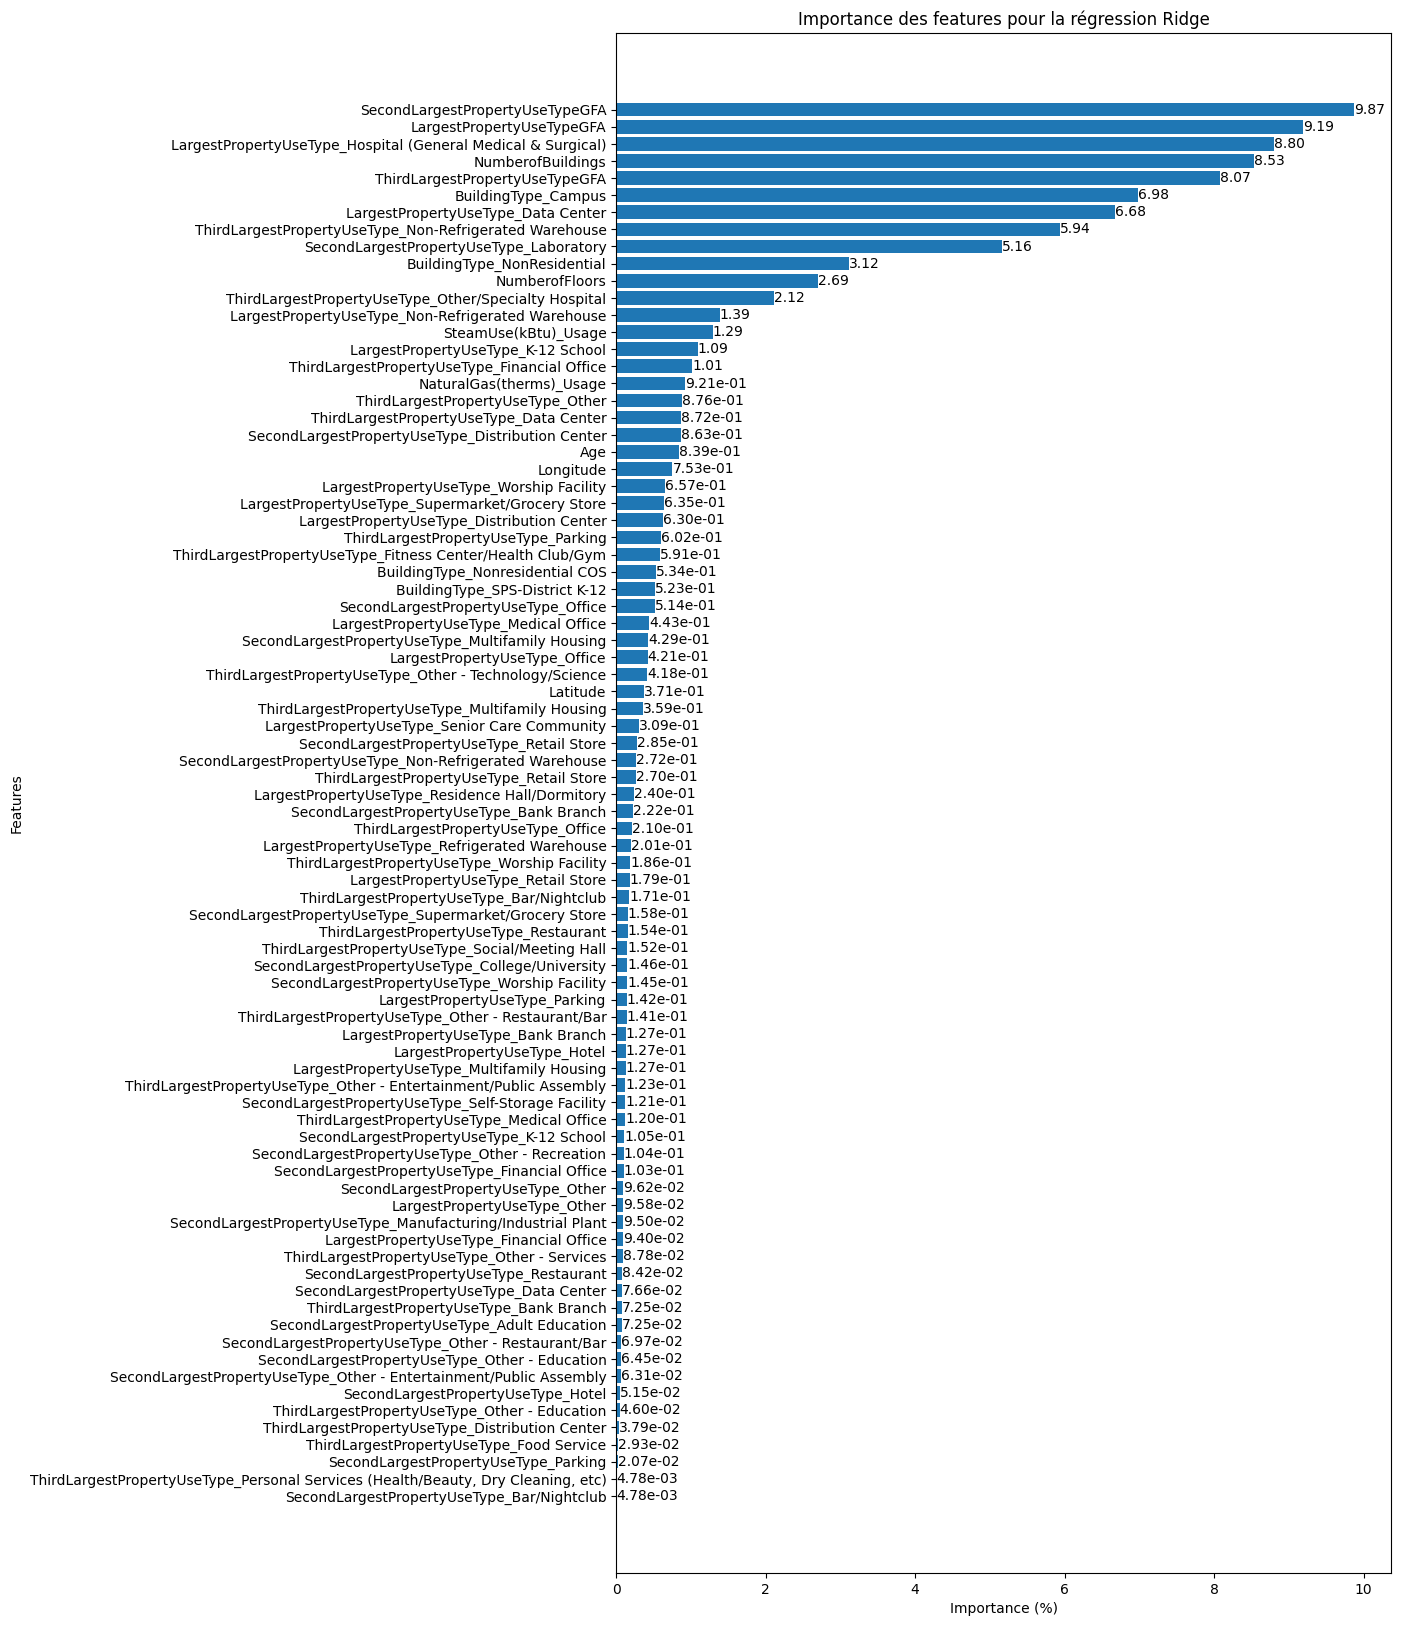

In [12]:
ridge_without_ENERGY = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='ridge')

In [13]:
ridge_without_ENERGY

alpha   R2_Test     RMSE_Test      MAE_Test
Régression Ridge  1291.549665  0.663732  1.407728e+07  5.499966e+06

#### Régréssion Lasso

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+14, tolerance: 2.823e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+15, tolerance: 4.928e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

Folds         alpha        R2          RMSE           MAE  R2_rank  \
0     10  10000.000000 -9.631252  2.587772e+07  8.153616e+06       11   
1     10      0.000100 -9.807447  2.591345e+07  8.205237e+06       14   
2     10   1291.549665 -9.785461  2.594303e+07  8.204804e+06       12   
3     10      0.000774 -9.807453  2.591358e+07  8.205289e+06       15   
4      5  10000.000000 -5.105531  3.226496e+07  8.628092e+06        1   
5     10      0.005995 -9.807495  2.591458e+07  8.205689e+06       16   
6      5   1291.549665 -5.162983  3.237396e+07  8.689167e+06        2   
7     10    166.810054 -9.805563  2.595138e+07  8.211470e+06       13   
8     10      0.046416 -9.807687  2.592049e+07  8.206322e+06       17   
9      5    166.810054 -5.170512  3.238738e+07  8.697241e+06        3   

   RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0          1         1        4.333333           1  
1          2         3        6.333333           2  
2          6         2        6.666667           3  
3          3         4        7.333333           4  
4         11        11        7.666667           5  
5          4         5        8.333333           6  
6         12        12        8.666667           7  
7          7         7        9.000000           8  
8          5         6        9.333333           9  
9         13        13        9.666667          10

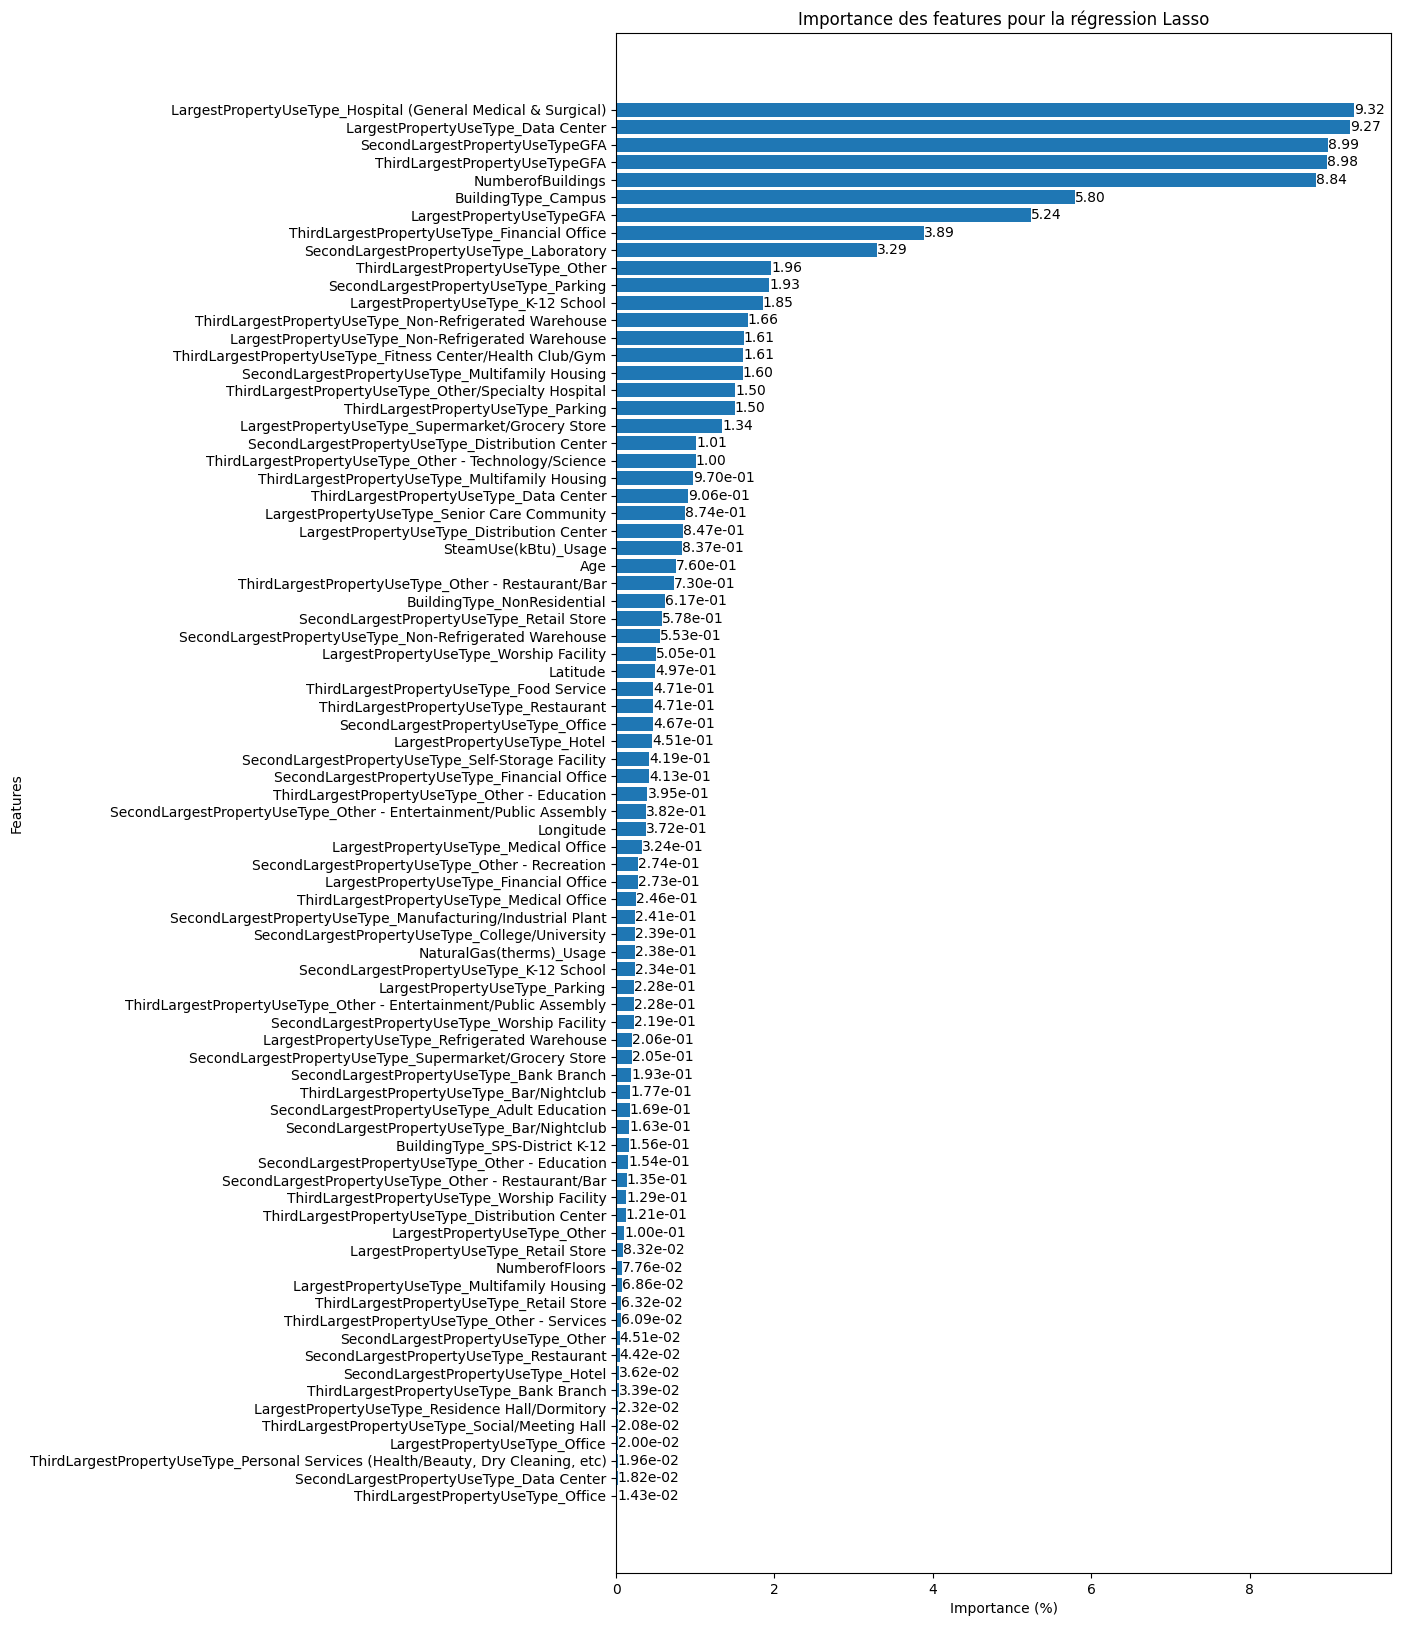

In [14]:
lasso_without_ENERGY = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='lasso')

In [15]:
lasso_without_ENERGY

alpha  R2_Test     RMSE_Test      MAE_Test
Régression Lasso  10000.0  0.39877  1.882332e+07  6.704745e+06

### Approche Non-Linéaire

#### XGBRegressor

Folds  n_estimators  learning_rate        R2          RMSE           MAE  \
0    10           100          0.255  0.024407  1.932010e+07  5.061990e+06   
1    10           200          0.255  0.023105  1.932035e+07  5.075046e+06   
2    10           300          0.255  0.023037  1.932066e+07  5.075606e+06   
3    10           100          0.010  0.369637  1.957257e+07  5.186550e+06   
4    10           400          0.255  0.023019  1.932066e+07  5.075821e+06   
5    10           400          0.010  0.100892  1.986118e+07  5.107504e+06   
6    10           500          0.255  0.023018  1.932067e+07  5.075832e+06   
7    10           500          0.010  0.085198  1.990420e+07  5.110245e+06   
8    10           200          0.010  0.168365  2.004409e+07  5.079491e+06   
9    10           300          0.010  0.115280  1.998205e+07  5.122314e+06   

   R2_rank  RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0       10          1         1        4.000000           1  
1       11          2         2        5.000000           2  
2       12          3         3        6.000000           3  
3        1          6        12        6.333333           4  
4       13          4         4        7.000000           5  
5        5         12         7        8.000000           6  
6       14          5         5        8.000000           6  
7        7         13         8        9.333333           8  
8        3         20         6        9.666667           9  
9        4         19         9       10.666667          10

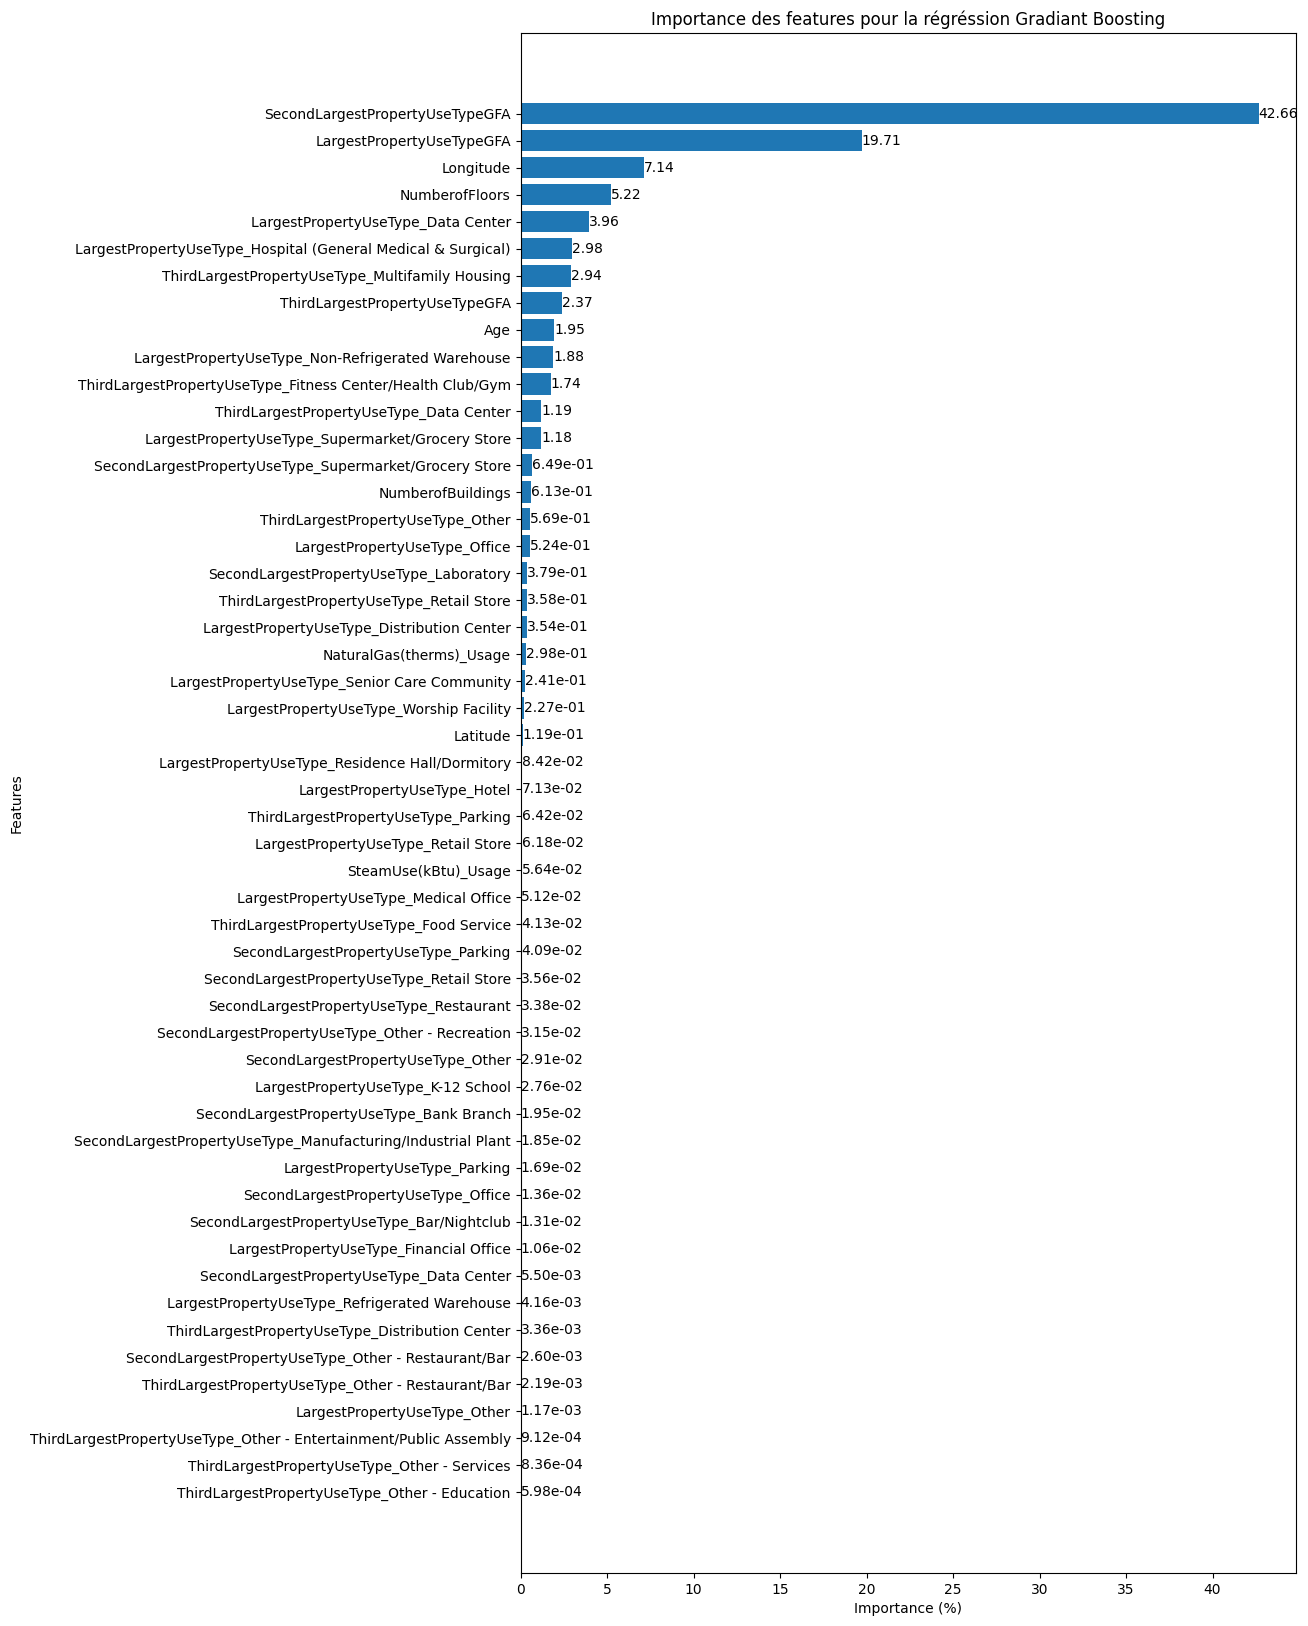

In [16]:
xgb_without_ENERGY = evaluate_xgb_regressor(X_train, X_test, Y_train, Y_test)

In [17]:
xgb_without_ENERGY

n_estimators  learning_rate   R2_Test     RMSE_Test  \
Régression XGBoost           100          0.255  0.306832  2.021134e+07   

                        MAE_Test  
Régression XGBoost  5.241623e+06

#### Forêt aléatoire

Folds  n_estimators  max_depth        R2          RMSE           MAE  \
0    10           300         20 -0.055107  1.859106e+07  5.002598e+06   
1    10           100         20 -0.067102  1.864363e+07  4.991299e+06   
2     5           100         15  0.200546  2.121960e+07  5.003766e+06   
3     5           500         15  0.200364  2.110664e+07  5.024840e+06   
4     5           500         20  0.160059  2.108610e+07  5.030620e+06   
5    10           200         20 -0.055965  1.869900e+07  5.016430e+06   
6    10           500         20 -0.096318  1.868182e+07  5.012800e+06   
7     5           400         15  0.166477  2.118894e+07  5.029716e+06   
8    10           100         10 -0.130081  1.856486e+07  5.017198e+06   
9     5           200         15  0.211907  2.130716e+07  5.042383e+06   

   R2_rank  RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0       26          2         3       10.333333           1  
1       28          3         1       10.666667           2  
2        2         27         4       11.000000           3  
3        3         23         9       11.666667           4  
4        5         21        11       12.333333           5  
5       27          5         6       12.666667           6  
6       29          4         5       12.666667           6  
7        4         25        10       13.000000           8  
8       33          1         7       13.666667           9  
9        1         29        15       15.000000          10

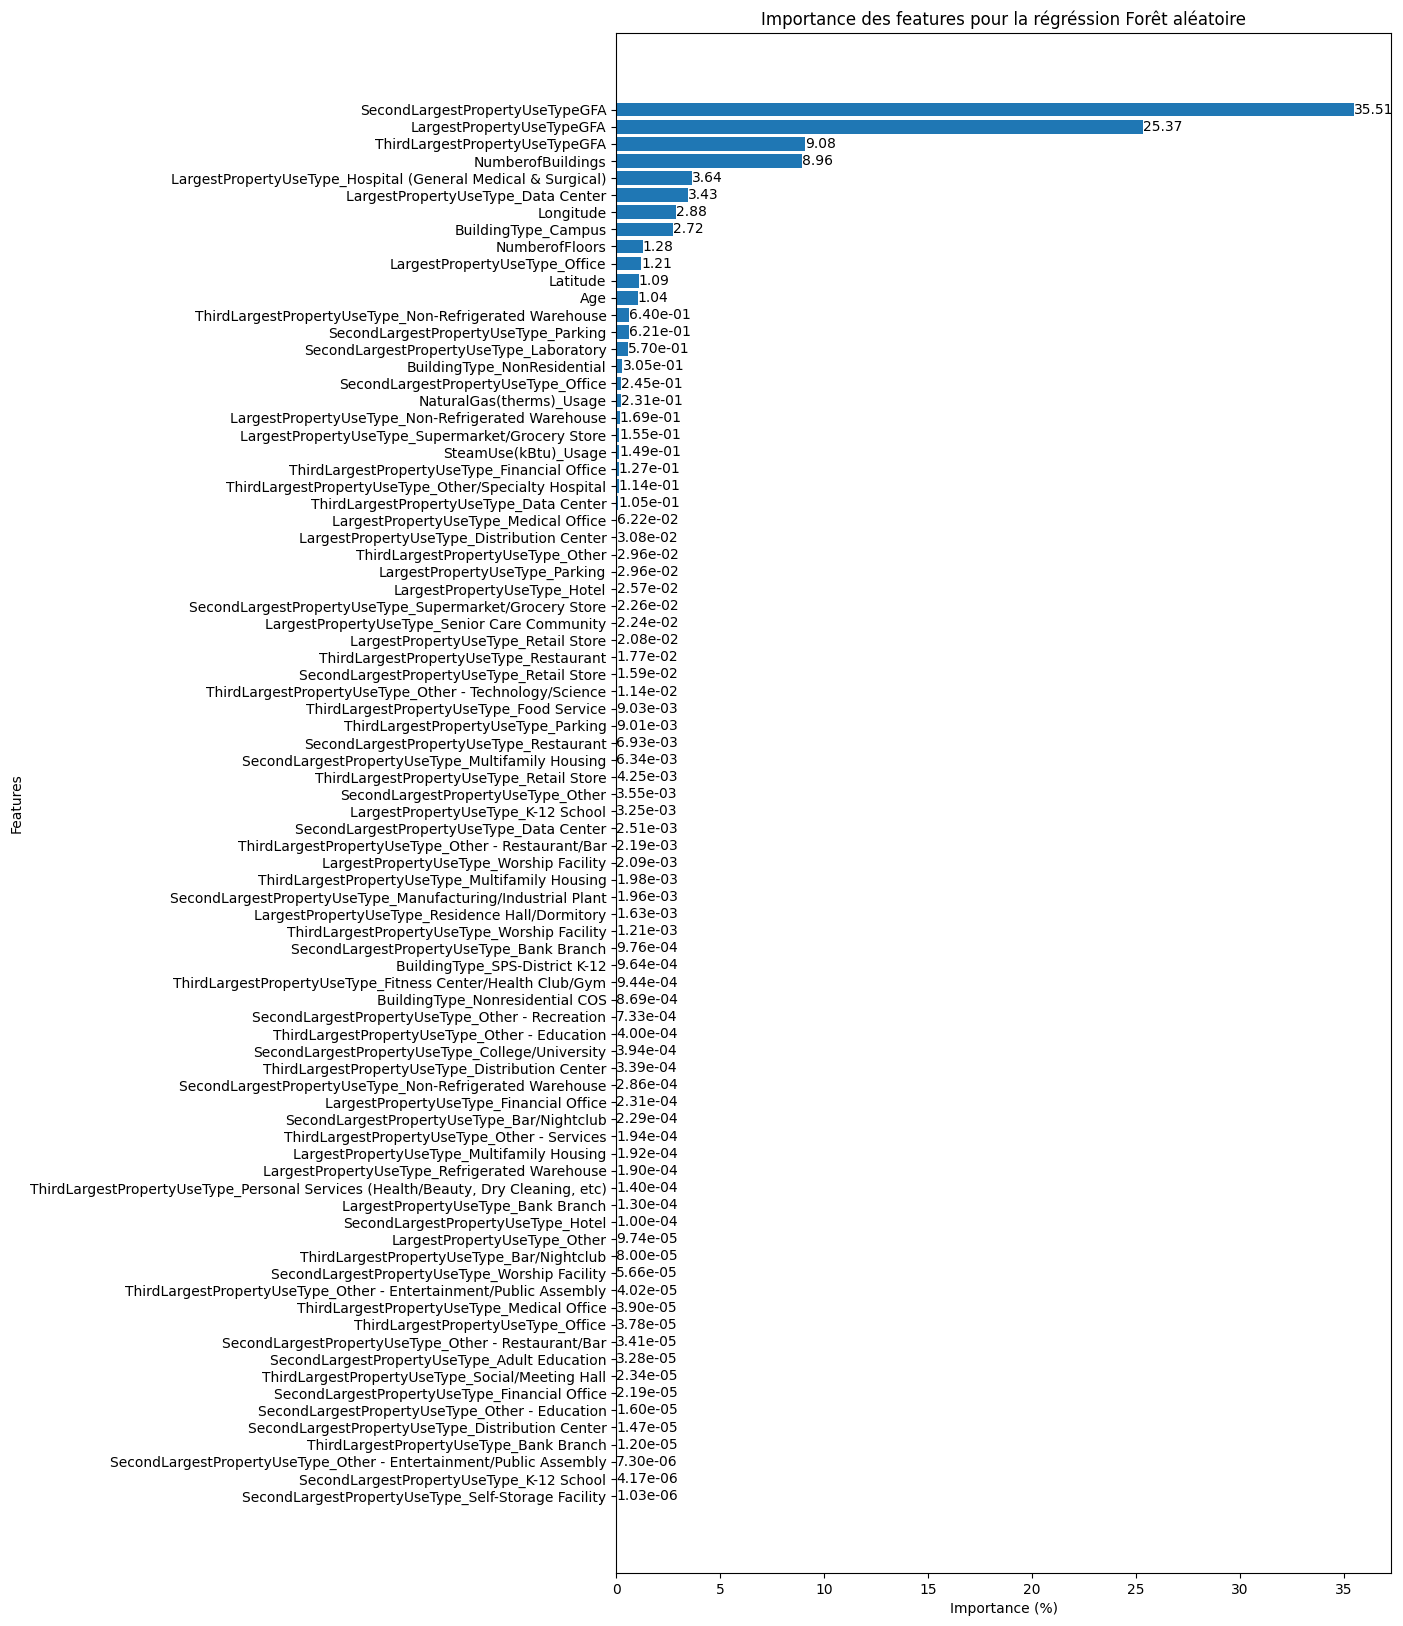

In [18]:
randomForest_without_ENERGY = evaluate_random_forest(X_train, X_test, Y_train, Y_test)

In [19]:
randomForest_without_ENERGY 

n_estimators  max_depth  R2_Test     RMSE_Test  \
Régression Random Forest           300         20  0.61108  1.513931e+07   

                              MAE_Test  
Régression Random Forest  4.861190e+06

## AVEC ENERGYSTARScore

On va créer X (features) et Y (target)

In [20]:
X_train, X_test, Y_train, Y_test = prepare_data(df, target_col = 'SiteEnergyUseWN(kBtu)', cols_to_drop = ['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'])

### Approche Naive (DummyRegressor)

In [21]:
dummy_with_ENERGY = evaluate_dummy_regressor(X_train, X_test, Y_train, Y_test)

Folds  strategy param_value           R2          RMSE           MAE  \
0     10  quantile        0.75    -0.075709  2.332429e+07  7.879502e+06   
1     10  quantile         0.5    -0.116745  2.382028e+07  6.802106e+06   
2      5  quantile         0.5    -0.061929  2.745545e+07  6.813297e+06   
3      5  quantile        0.75    -0.016802  2.700094e+07  7.919266e+06   
4     10  quantile        0.25    -0.204948  2.414694e+07  7.019612e+06   
5      5  quantile        0.25    -0.099961  2.771065e+07  7.025116e+06   
6      5      mean        None    -0.094664  2.720751e+07  9.363862e+06   
7     10  quantile           0    -0.358949  2.462706e+07  7.962968e+06   
8     10      mean        None    -0.361381  2.364181e+07  9.334818e+06   
9      5  quantile           0    -0.160263  2.808006e+07  7.964116e+06   
10     5  quantile           1 -1227.782058  4.299401e+08  4.292996e+08   
11    10  quantile           1 -3919.738915  4.474300e+08  4.467969e+08   

    R2_rank  RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0         3          1         5        3.000000           1  
1         6          3         1        3.333333           2  
2         2          8         2        4.000000           3  
3         1          6         6        4.333333           4  
4         8          4         3        5.000000           5  
5         5          9         4        6.000000           6  
6         4          7        10        7.000000           7  
7         9          5         7        7.000000           7  
8        10          2         9        7.000000           7  
9         7         10         8        8.333333          10  
10       11         11        11       11.000000          11  
11       12         12        12       12.000000          12

In [22]:
dummy_with_ENERGY

Strategy  Parameter Value   R2_Test     RMSE_Test  \
Régréssion Dummy  quantile             0.75 -0.018233  2.449626e+07   

                      MAE_Test  
Régréssion Dummy  8.004746e+06

### Approche Linéaire

#### Régréssion Ridge

Folds         alpha        R2          RMSE           MAE  R2_rank  \
0     10   1291.549665  0.344520  1.880962e+07  6.050413e+06        1   
1      5   1291.549665  0.307817  2.228049e+07  6.084940e+06        2   
2     10    166.810054 -1.325122  2.056992e+07  6.375671e+06        6   
3      5    166.810054 -0.750436  2.229100e+07  6.089043e+06        5   
4     10  10000.000000 -0.001187  2.168559e+07  8.143408e+06        4   
5     10     21.544347 -5.560680  2.355704e+07  7.527515e+06       14   
6      5     21.544347 -2.798708  2.629977e+07  7.472149e+06        7   
7     10      2.782559 -8.810936  2.511068e+07  8.000551e+06       15   
8      5  10000.000000  0.119780  2.553945e+07  8.276612e+06        3   
9     10      0.359381 -9.562520  2.542587e+07  8.089862e+06       16   

   RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0          1         1        1.000000           1  
1          4         2        2.666667           2  
2          2         4        4.000000           3  
3          5         3        4.333333           4  
4          3        13        6.666667           5  
5          6         6        8.666667           6  
6         14         5        8.666667           6  
7          7         7        9.666667           8  
8         13        14       10.000000           9  
9          8         8       10.666667          10

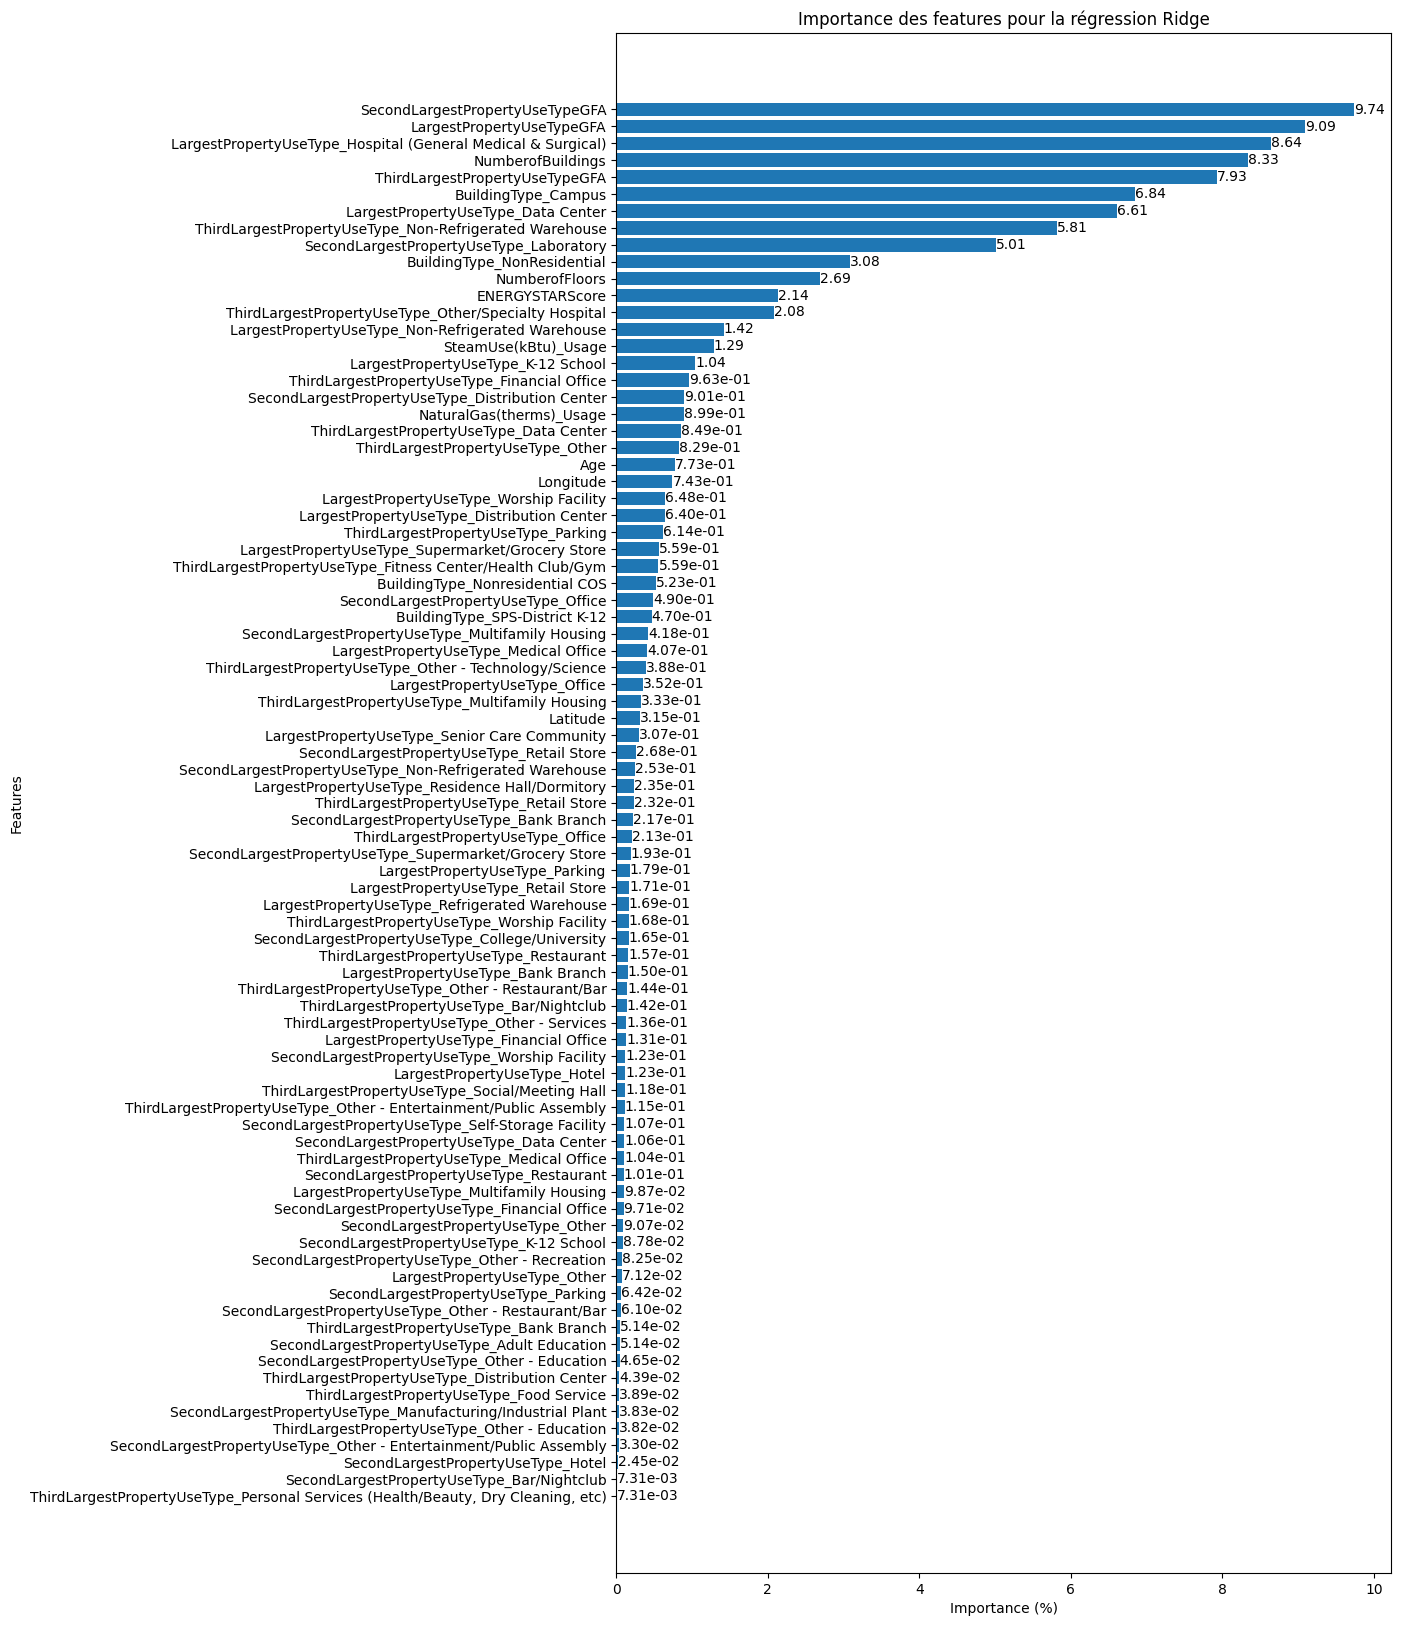

In [23]:
ridge_with_ENERGY = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='ridge')

In [24]:
ridge_with_ENERGY

alpha   R2_Test     RMSE_Test      MAE_Test
Régression Ridge  1291.549665  0.665952  1.403074e+07  5.459483e+06

#### Régréssion Lasso

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+15, tolerance: 2.823e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.324e+14, tolerance: 4.928e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

Folds         alpha        R2          RMSE           MAE  R2_rank  \
0     10  10000.000000 -9.520334  2.539088e+07  8.041009e+06       11   
1     10      0.000100 -9.684603  2.543538e+07  8.097268e+06       14   
2     10   1291.549665 -9.664006  2.545478e+07  8.092574e+06       12   
3     10      0.000774 -9.684609  2.543551e+07  8.097324e+06       15   
4      5  10000.000000 -4.929254  3.178596e+07  8.536103e+06        1   
5     10      0.005995 -9.684653  2.543657e+07  8.097752e+06       16   
6      5   1291.549665 -4.986444  3.189323e+07  8.596086e+06        2   
7     10    166.810054 -9.682647  2.546305e+07  8.099235e+06       13   
8     10      0.046416 -9.684845  2.544254e+07  8.098560e+06       17   
9      5    166.810054 -4.993969  3.190720e+07  8.603999e+06        3   

   RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0          1         1        4.333333           1  
1          2         3        6.333333           2  
2          6         2        6.666667           3  
3          3         4        7.333333           4  
4         11        11        7.666667           5  
5          4         5        8.333333           6  
6         12        12        8.666667           7  
7          7         7        9.000000           8  
8          5         6        9.333333           9  
9         13        13        9.666667          10

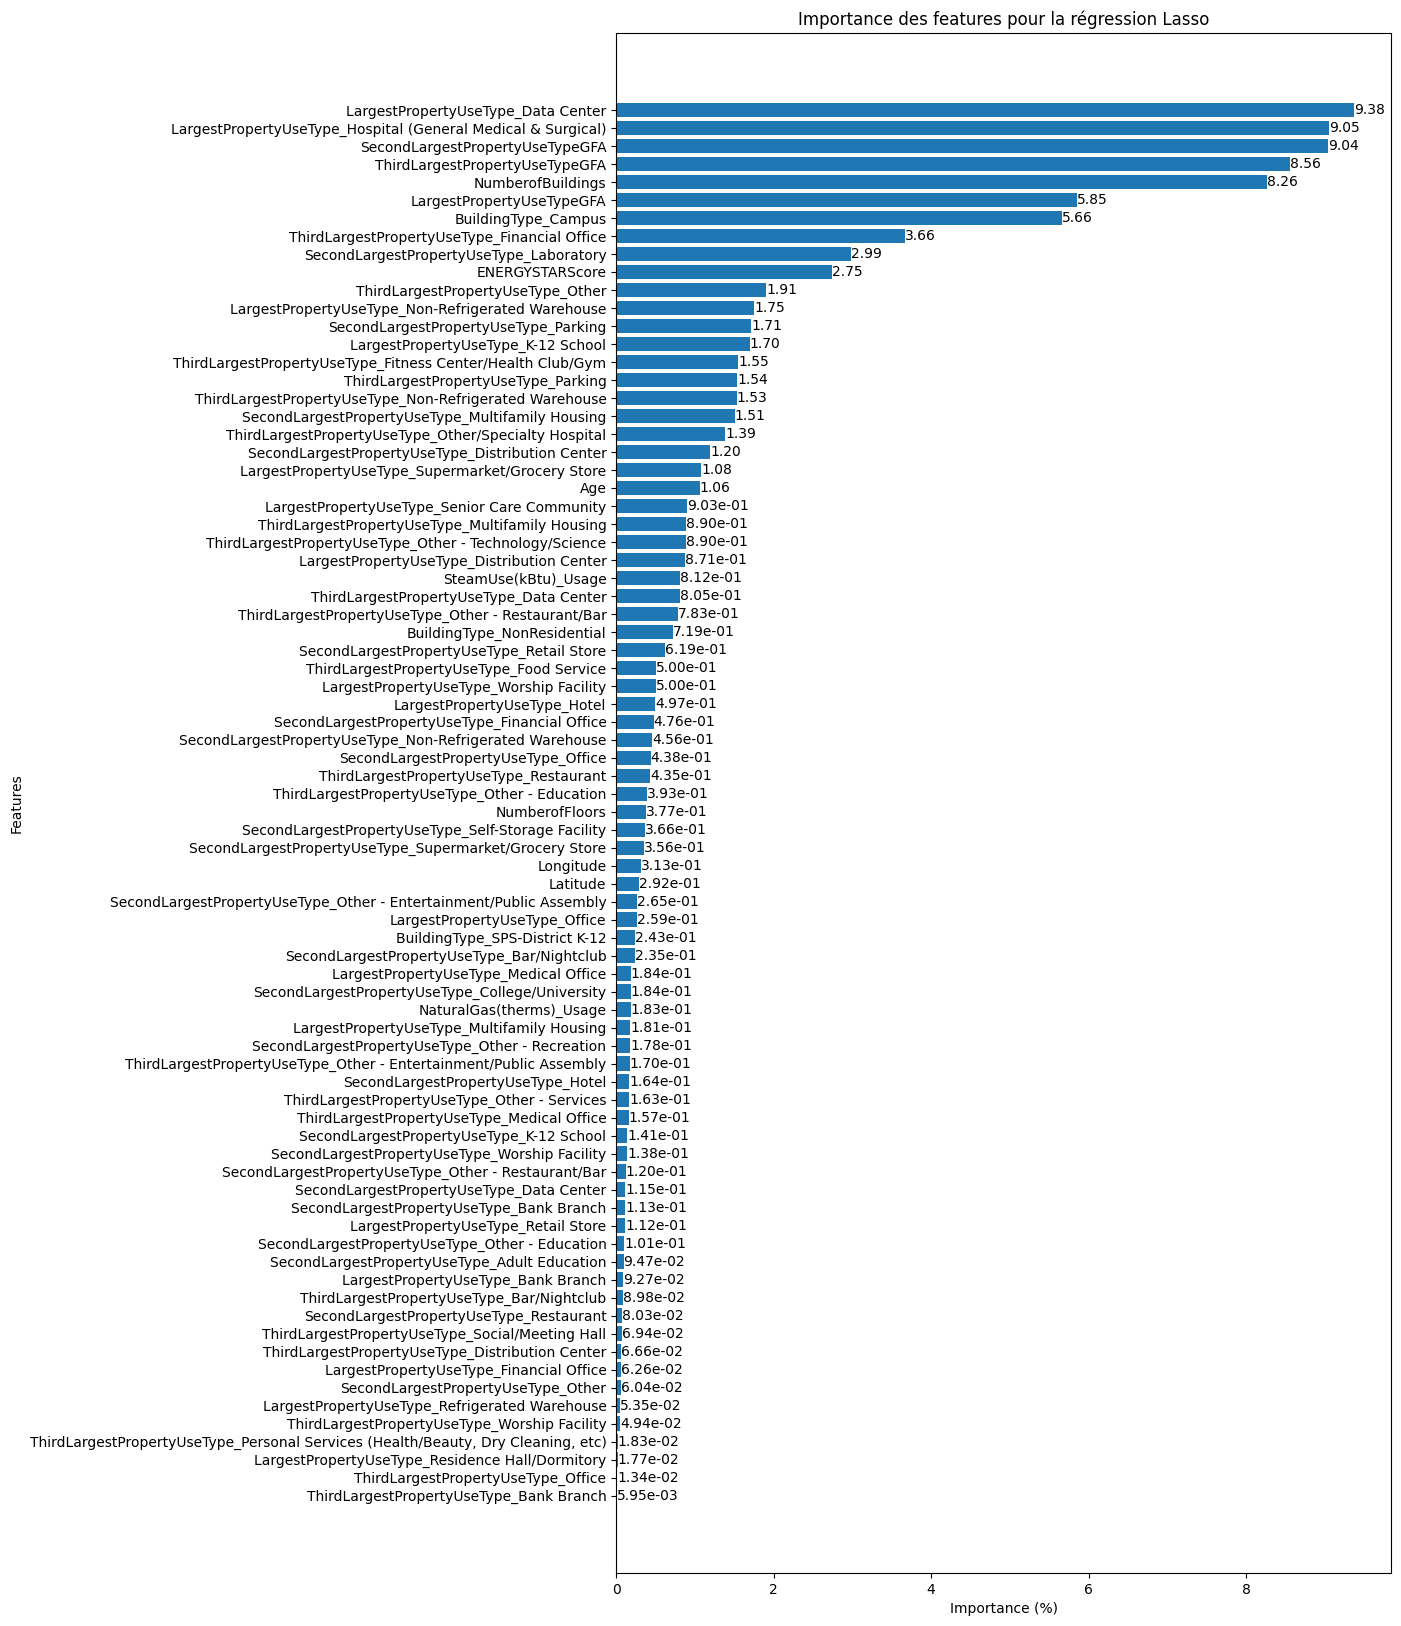

In [25]:
lasso_with_ENERGY = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='lasso')

In [26]:
lasso_with_ENERGY

alpha   R2_Test     RMSE_Test      MAE_Test
Régression Lasso  10000.0  0.409996  1.864677e+07  6.828341e+06

### Approche Non-Linéaire

#### XGBRegressor

Folds  n_estimators  learning_rate        R2          RMSE           MAE  \
0    10           100         0.2550  0.092408  1.887635e+07  4.460374e+06   
1    10           200         0.2550  0.091529  1.887598e+07  4.461089e+06   
2    10           300         0.2550  0.091529  1.887582e+07  4.461224e+06   
3    10           400         0.2550  0.091528  1.887582e+07  4.461195e+06   
4    10           500         0.2550  0.091527  1.887582e+07  4.461198e+06   
5    10           400         0.0100  0.144329  1.930694e+07  4.710553e+06   
6    10           200         0.1325  0.005809  1.915825e+07  4.575599e+06   
7    10           500         0.0100  0.126045  1.935261e+07  4.685008e+06   
8    10           300         0.0100  0.155573  1.942164e+07  4.754371e+06   
9    10           300         0.1325  0.005736  1.916089e+07  4.581515e+06   

   R2_rank  RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0        8          5         1        4.666667           1  
1        9          4         2        5.000000           2  
2       10          1         5        5.333333           3  
3       11          2         3        5.333333           3  
4       12          3         4        6.333333           5  
5        5         11        17       11.000000           6  
6       21          6         6       11.000000           6  
7        6         12        16       11.333333           8  
8        4         13        18       11.666667           9  
9       22          7         8       12.333333          10

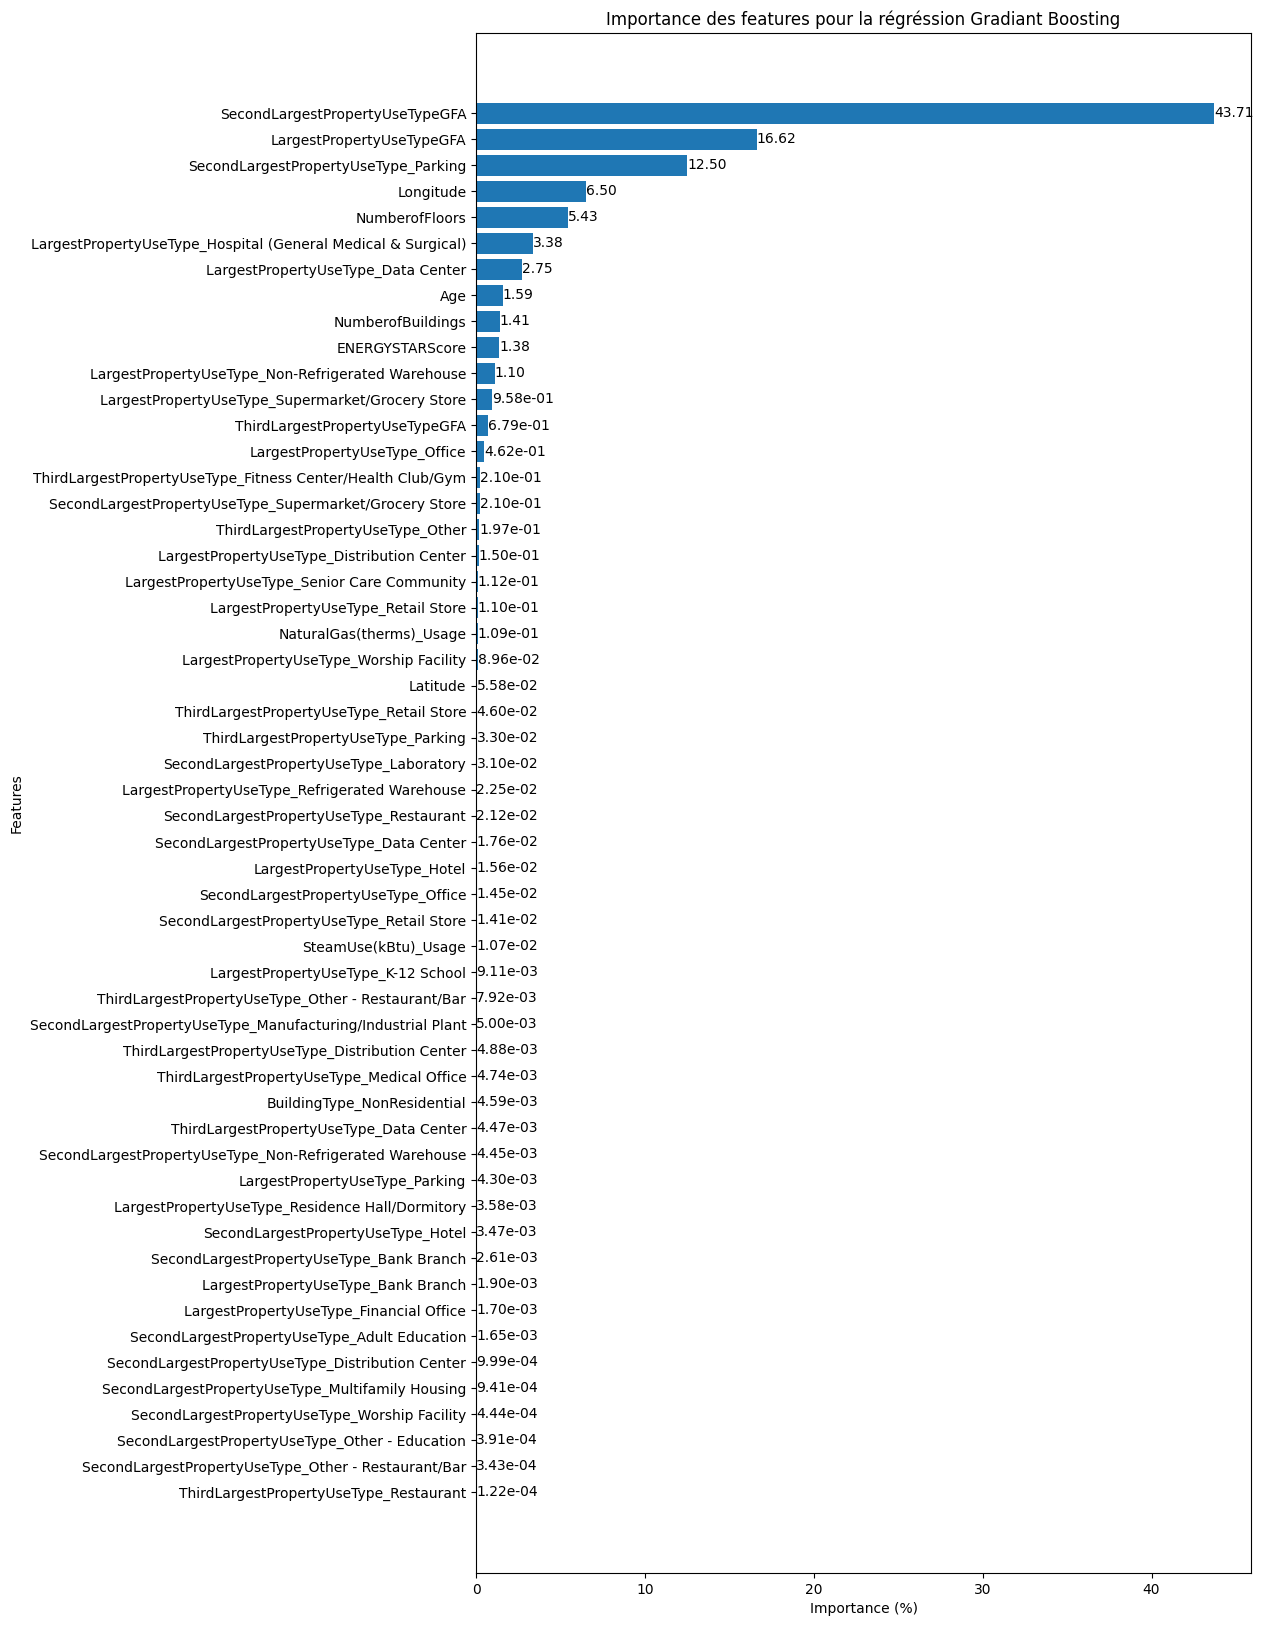

In [27]:
xgb_with_ENERGY = evaluate_xgb_regressor(X_train, X_test, Y_train, Y_test)

In [28]:
xgb_with_ENERGY

n_estimators  learning_rate   R2_Test     RMSE_Test  \
Régression XGBoost           100          0.255  0.341947  1.969276e+07   

                        MAE_Test  
Régression XGBoost  4.926665e+06

#### Forêt aléatoire

Folds  n_estimators  max_depth        R2          RMSE           MAE  \
0    10           200         20  0.034173  1.807914e+07  4.495741e+06   
1     5           100         20  0.287633  2.051600e+07  4.543995e+06   
2     5           500         20  0.256388  2.060343e+07  4.535776e+06   
3    10           500         20 -0.000900  1.815131e+07  4.516480e+06   
4    10           300         20  0.012717  1.818527e+07  4.536462e+06   
5    10           400         20 -0.009318  1.818656e+07  4.528953e+06   
6    10           100         10 -0.087095  1.812743e+07  4.512512e+06   
7    10           100         20 -0.064650  1.821180e+07  4.488563e+06   
8     5           400         20  0.230756  2.065186e+07  4.530038e+06   
9    10           500         10 -0.012947  1.811126e+07  4.564463e+06   

   R2_rank  RMSE_rank  MAE_rank  Aggregate_rank  Rank_final  
0       25          1         2        9.333333           1  
1        4         22        10       12.000000           2  
2        6         25         7       12.666667           3  
3       29          6         4       13.000000           4  
4       26          8         8       14.000000           5  
5       32          9         5       15.333333           6  
6       41          4         3       16.000000           7  
7       38         10         1       16.333333           8  
8       17         27         6       16.666667           9  
9       33          2        18       17.666667          10

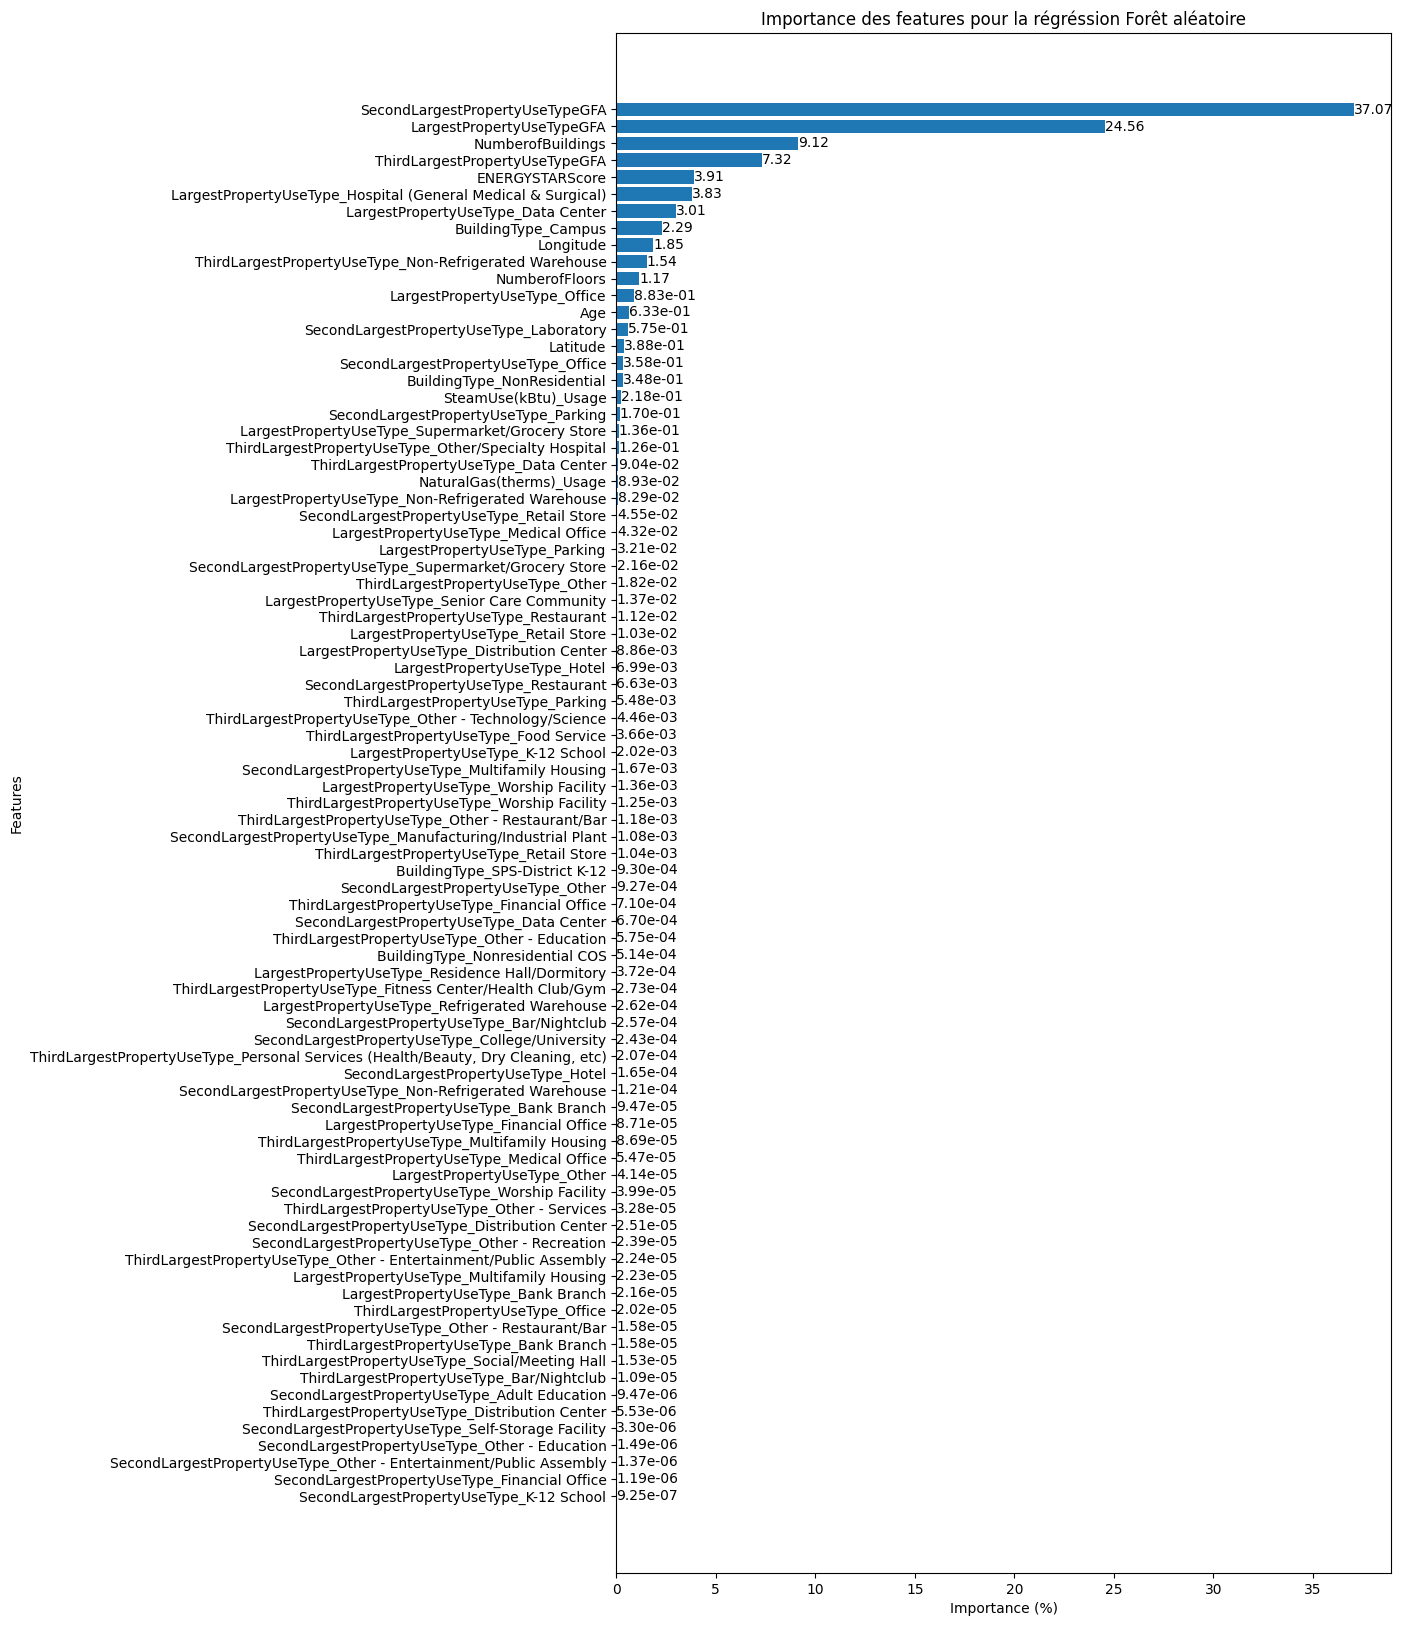

In [29]:
randomForest_with_ENERGY = evaluate_random_forest(X_train, X_test, Y_train, Y_test)

In [30]:
randomForest_with_ENERGY

n_estimators  max_depth   R2_Test     RMSE_Test  \
Régression Random Forest           200         20  0.607837  1.520230e+07   

                              MAE_Test  
Régression Random Forest  4.690968e+06

# Comparaisons

## Target #2 : SiteEnergyUseWN(kBtu)

In [31]:
a_wo = dummy_without_ENERGY
a_wo = a_wo.rename(index={'Régréssion Dummy': 'Dummy (SANS ESS)'})
a_wo = a_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
a_wo

R2_Test     RMSE_Test      MAE_Test
Dummy (SANS ESS) -0.018233  2.449626e+07  8.004746e+06

In [32]:
b_wo = ridge_without_ENERGY
b_wo = b_wo.rename(index={'Régression Ridge': 'Ridge (SANS ESS)'})
b_wo = b_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
b_wo

R2_Test     RMSE_Test      MAE_Test
Ridge (SANS ESS)  0.663732  1.407728e+07  5.499966e+06

In [33]:
c_wo = lasso_without_ENERGY
c_wo = c_wo.rename(index={'Régression Lasso': 'Lasso (SANS ESS)'})
c_wo = c_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
c_wo

R2_Test     RMSE_Test      MAE_Test
Lasso (SANS ESS)  0.39877  1.882332e+07  6.704745e+06

In [34]:
d_wo = xgb_without_ENERGY
d_wo = d_wo.rename(index={'Régression XGBoost': 'XGBoost (SANS ESS)'})
d_wo = d_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
d_wo

R2_Test     RMSE_Test      MAE_Test
XGBoost (SANS ESS)  0.306832  2.021134e+07  5.241623e+06

In [35]:
e_wo = randomForest_without_ENERGY
e_wo = e_wo.rename(index={'Régression Random Forest': 'Random Forest (SANS ESS)'})
e_wo = e_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
e_wo

R2_Test     RMSE_Test      MAE_Test
Random Forest (SANS ESS)  0.61108  1.513931e+07  4.861190e+06

In [36]:
df_merged_wo = pd.concat([a_wo, b_wo,c_wo,d_wo,e_wo])

df_merged_wo

R2_Test     RMSE_Test      MAE_Test
Dummy (SANS ESS)         -0.018233  2.449626e+07  8.004746e+06
Ridge (SANS ESS)          0.663732  1.407728e+07  5.499966e+06
Lasso (SANS ESS)          0.398770  1.882332e+07  6.704745e+06
XGBoost (SANS ESS)        0.306832  2.021134e+07  5.241623e+06
Random Forest (SANS ESS)  0.611080  1.513931e+07  4.861190e+06

In [37]:
def highlight_max_min(df):
    # Définir une fonction pour appliquer le style CSS
    def apply_style(series):
        min_value = series.min()
        max_value = series.max()
        colors = []
        for val in series:
            if series.name == 'R2_Test':
                color = 'green' if val == max_value else 'crimson' if val == min_value else ''
            else:  # for 'RMSE_Test' and 'MAE_Test'
                color = 'green' if val == min_value else 'crimson' if val == max_value else ''
            colors.append(f'background-color: {color}' if color else '')
        return colors

    df_styled = df.style.apply(apply_style)
    
    return df_styled

df_merged_styled_wo = highlight_max_min(df_merged_wo)
df_merged_styled_wo


In [38]:
a_w = dummy_with_ENERGY
a_w = a_w.rename(index={'Régréssion Dummy': 'Dummy (AVEC ESS)'})
a_w = a_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
a_w

R2_Test     RMSE_Test      MAE_Test
Dummy (AVEC ESS) -0.018233  2.449626e+07  8.004746e+06

In [39]:
b_w = ridge_with_ENERGY
b_w = b_w.rename(index={'Régression Ridge': 'Ridge (AVEC ESS)'})
b_w = b_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
b_w

R2_Test     RMSE_Test      MAE_Test
Ridge (AVEC ESS)  0.665952  1.403074e+07  5.459483e+06

In [40]:
c_w = lasso_with_ENERGY
c_w = c_w.rename(index={'Régression Lasso': 'Lasso (AVEC ESS)'})
c_w = c_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
c_w

R2_Test     RMSE_Test      MAE_Test
Lasso (AVEC ESS)  0.409996  1.864677e+07  6.828341e+06

In [41]:
d_w = xgb_with_ENERGY 
d_w = d_w.rename(index={'Régression XGBoost': 'XGBoost (AVEC ESS)'})
d_w = d_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
d_w

R2_Test     RMSE_Test      MAE_Test
XGBoost (AVEC ESS)  0.341947  1.969276e+07  4.926665e+06

In [42]:
e_w = randomForest_with_ENERGY
e_w = e_w.rename(index={'Régression Random Forest': 'Random Forest (AVEC ESS)'})
e_w = e_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
e_w

R2_Test     RMSE_Test      MAE_Test
Random Forest (AVEC ESS)  0.607837  1.520230e+07  4.690968e+06

In [43]:
df_merged_w = pd.concat([a_w, b_w,c_w,d_w,e_w])

df_merged_w

R2_Test     RMSE_Test      MAE_Test
Dummy (AVEC ESS)         -0.018233  2.449626e+07  8.004746e+06
Ridge (AVEC ESS)          0.665952  1.403074e+07  5.459483e+06
Lasso (AVEC ESS)          0.409996  1.864677e+07  6.828341e+06
XGBoost (AVEC ESS)        0.341947  1.969276e+07  4.926665e+06
Random Forest (AVEC ESS)  0.607837  1.520230e+07  4.690968e+06

In [44]:
df_merged_styled_w = highlight_max_min(df_merged_w)
df_merged_styled_w

In [45]:
# Supprimer " (SANS ESS)" et " (AVEC ESS)" des index
df_merged_wo.index = df_merged_wo.index.str.replace(" \(SANS ESS\)", "")
df_merged_w.index = df_merged_w.index.str.replace(" \(AVEC ESS\)", "")

# Assurez-vous que les indices correspondent pour la soustraction
df_merged_wo = df_merged_wo.reindex(df_merged_w.index)

# Soustraire df_merged_w de df_merged_wo
df_result = df_merged_wo - df_merged_w

# Afficher le résultat
df_result


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18812\2870740796.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged_wo.index = df_merged_wo.index.str.replace(" \(SANS ESS\)", "")
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18812\2870740796.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged_w.index = df_merged_w.index.str.replace(" \(AVEC ESS\)", "")


R2_Test      RMSE_Test       MAE_Test
Dummy          0.000000       0.000000       0.000000
Ridge         -0.002220   46540.987337   40482.899056
Lasso         -0.011225  176551.746563 -123595.631943
XGBoost       -0.035114  518582.125110  314958.776555
Random Forest  0.003243  -62992.722381  170221.541936

In [46]:
def color_cells(val):
    """
    Prend une valeur scalaire et renvoie une chaîne avec
    les propriétés css à être rendues dans la cellule.
    """
    if val < 0:
        color = 'green'
    else:
        color = 'crimson'
    return 'background-color: %s' % color

def highlight_df(df):
    r2_style = df['R2_Test'].apply(color_cells)
    rmse_style = df['RMSE_Test'].apply(lambda x: color_cells(-x))  # Inverser la condition
    mae_style = df['MAE_Test'].apply(lambda x: color_cells(-x))  # Inverser la condition
    df_style = pd.concat([r2_style, rmse_style, mae_style], axis=1)
    return df_style

df_result.style.apply(highlight_df, axis=None)


Conclusion : 
- Ridge est le meilleur algo à utiliser
- Rajouter la feature ENERGYSTARScore augmente la performance de nos modèles